In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Basic EDA

In [105]:
data_frame = pd.read_csv("./CASE1201.ASC.txt", delimiter= " ", skipinitialspace= True)
data_frame.head()

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [106]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   50 non-null     object 
 1   sat     50 non-null     int64  
 2   takers  50 non-null     int64  
 3   income  50 non-null     int64  
 4   years   50 non-null     float64
 5   public  50 non-null     float64
 6   expend  50 non-null     float64
 7   rank    50 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.3+ KB


In [107]:
data_frame.describe()

,sat,takers,income,years,public,expend,rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


### Display the correlation and covariance tables for the raw features.

In [108]:
#Correlation matrix
correlation_matrix = data_frame.corr(method= "pearson", numeric_only= True)
correlation_matrix

,sat,takers,income,years,public,expend,rank
sat,1.000000,-0.857810,0.584467,0.330969,-0.080357,-0.062878,0.879909
takers,-0.857810,1.000000,-0.661935,-0.101544,0.123556,0.283630,-0.942833
income,0.584467,-0.661935,1.000000,0.134762,-0.306567,0.131519,0.532700
years,0.330969,-0.101544,0.134762,1.000000,-0.417118,0.059829,0.070224
public,-0.080357,0.123556,-0.306567,-0.417118,1.000000,0.284591,0.050624
expend,-0.062878,0.283630,0.131519,0.059829,0.284591,1.000000,-0.264969
rank,0.879909,-0.942833,0.532700,0.070224,0.050624,-0.264969,1.000000


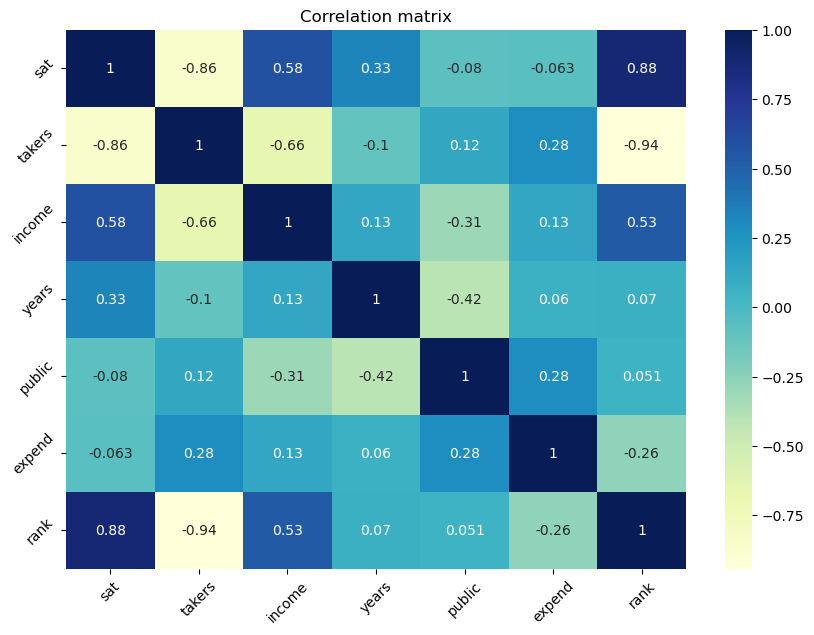

In [109]:
plt.figure(figsize=(10, 7))
sns.heatmap(data= correlation_matrix, annot= True, cmap= "YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation matrix")
plt.show()

In [110]:
covariance_matrix = data_frame.cov(numeric_only= True)
covariance_matrix

,sat,takers,income,years,public,expend,rank
sat,5020.628980,-1338.557959,1809.468163,16.415461,-55.975265,-27.377412,406.695184
takers,-1338.557959,484.991429,-636.934286,-1.565331,26.750122,38.382824,-135.442204
income,1809.468163,-636.934286,1909.081224,4.121616,-131.683592,35.311747,151.826286
years,16.415461,-1.565331,4.121616,0.489975,-2.870384,0.257343,0.320643
public,-55.975265,26.750122,-131.683592,-2.870384,96.646922,17.192242,3.246376
expend,-27.377412,38.382824,35.311747,0.257343,17.192242,37.760192,-10.620972
rank,406.695184,-135.442204,151.826286,0.320643,3.246376,-10.620972,42.550465


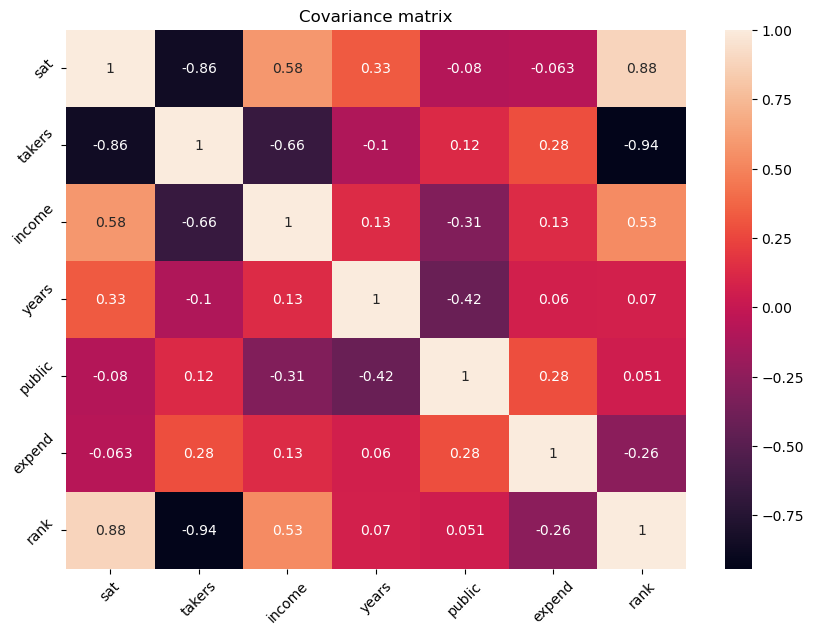

In [111]:
plt.figure(figsize=(10, 7))
sns.heatmap(data= correlation_matrix, annot= True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Covariance matrix")
plt.show()

### Build a: (a) simple (intercept + takers) and (b) full linear regression model to predict the SAT scores.

In [112]:
#Univariate Linear regression using intercept and taker only
X_train_univariate= data_frame["takers"]
y_train = data_frame["sat"]

#Adding constant. It represents intercept. 
X_train_univariate_with_const = sm.add_constant(X_train_univariate)
print(X_train_univariate_with_const.head())

#Simple univariate linear regression model
simple_ols_model = sm.OLS(y_train, X_train_univariate_with_const).fit()

simple_ols_model.summary()

   const  takers
0    1.0       3
1    1.0       2
2    1.0       3
3    1.0       5
4    1.0       5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.77e-15
Time:                        11:20:32   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#Full Linear regression using intercept and taker only
X_train_multivariate= data_frame.drop(columns= ["state", "sat"])
# y_train = data_frame["sat"]

#Adding constant. It represents intercept. 
X_train_multivariate_with_const = sm.add_constant(X_train_multivariate)
print(X_train_multivariate_with_const.head())

#Full univariate linear regression model
full_ols_model = sm.OLS(y_train, X_train_multivariate_with_const).fit()

full_ols_model.summary()

   const  takers  income  years  public  expend  rank
0    1.0       3     326  16.79    87.8   25.60  89.7
1    1.0       2     264  16.07    86.2   19.95  90.6
2    1.0       3     317  16.57    88.3   20.62  89.8
3    1.0       5     338  16.30    83.9   27.14  86.3
4    1.0       5     293  17.25    83.6   21.05  88.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.16e-18
Time:                        11:20:32   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Choose at least one method from each of the three feature selection techniques (filter, wrapper, and embedded). Select and report the “best” features using these three methods.

In [114]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

#### Filter Technique (Mutual Information Gain)
- Mutual information measures the dependency between each feature and the target variable.
- High mutual information suggests a strong relationship between a feature and the target.

In [115]:
selector= SelectKBest(score_func= mutual_info_regression, k=4).fit(X= X_train_multivariate, y= y_train)
# print(selector.get_support())
selected_features = X_train_multivariate.columns[selector.get_support()]
print(f"Best 4 predictors:: {selected_features.to_list()}")

Best 4 predictors:: ['takers', 'income', 'public', 'rank']


In [116]:
#Filter method (Mutual Information Gain)
mutual_info = mutual_info_regression(X_train_multivariate, y_train, random_state= 42)

df = pd.DataFrame(data= {
    "Predictor Name": X_train_multivariate.columns,
    "Dependency Value": mutual_info})
df.sort_values(by= "Dependency Value", ascending= False).reset_index().drop("index", axis= 1)

,Predictor Name,Dependency Value
0,rank,0.763744
1,takers,0.683812
2,income,0.304914
3,public,0.111706
4,years,0.059230
5,expend,0.031271


By using **mutual information gain**, Features having strong association with the target variable from strongest to weakest order: 
- rank
- takers
- income
- public
- years
- expend

If we select best 4 pridectors then, rank, takers, income and public would be my choices using mutual information gain. SelectKBest method also showed same result. 

#### Wrapper Method (Exhaustive Feature Elimination)

In [117]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression


In [118]:
model = LinearRegression()

exhaustive_feature_selector = EFS(model,
          min_features=1,
          max_features=6,  # Adjust this to limit the feature subset size
          scoring='neg_mean_squared_error',  # Use an appropriate metric
          cv=5)

exhaustive_feature_selector.fit(X_train_multivariate, y_train)

best_features = list(exhaustive_feature_selector.best_feature_names_)
print("Best feature subset:", best_features)



Features: 63/63

Best feature subset: ['years', 'expend', 'rank']


While using Exhaustive Feature Elimination method from wrapper technique, **['years', 'expend', 'rank']** seem to have best performance for linear regression model.

#### Embedded methods (Elastic Net)

In [129]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet with a specific mixing parameter (alpha and l1_ratio)
elastic_net = ElasticNet(alpha= 0.1, l1_ratio=0.5)

# Fit the model
elastic_net.fit(X_train_multivariate, y_train)

# Get selected features
selected_features = X_train_multivariate.columns[(abs(elastic_net.coef_) > 2)]
print("Selected features:", selected_features)
elastic_net.coef_[(abs(elastic_net.coef_) > 2)]

Selected features: Index(['years', 'expend', 'rank'], dtype='object')


array([19.73825868,  2.32067558,  8.49635365])

While using elastic net from embedded technique for feature selection, We found ***['years', 'expend', 'rank']*** are the significant features. 

#### Did you expect to see any differences between the “best features” in the different models you chose? Do you see any significant differences? (answer this using a markdown cell in the .ipynb file).

In [120]:
#Using features from filter technique:
X_train_mutual_info_gain= data_frame[['takers', 'income', 'public', 'rank']]
X_train_mutual_info_gain_with_const = sm.add_constant(X_train_mutual_info_gain)

filter_technique_ols_model = sm.OLS(y_train, X_train_mutual_info_gain).fit()
filter_technique_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sat   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.042e+04
Date:                Tue, 12 Nov 2024   Prob (F-statistic):                    2.26e-67
Time:                        11:20:33   Log-Likelihood:                         -243.54
No. Observations:                  50   AIC:                                      495.1
Df Residuals:                      46   BIC:                                      502.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
takers         0.8141      0.255      3.195      0.003       0.301       1.327
income         0.2744      0.135      2.036      0.047       0.003       0.546
public        -0.7593      0.552     -1.375      0.176      -1.870       0.352
rank          11.3458      0.818     13.873      0.000       9.700      12.992
==============================================================================
Omnibus:                        4.021   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.859
Skew:                          -0.661   Prob(JB):                        0.145
Kurtosis:                       2.681   Cond. No.                         65.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#Using features from Wrapper technique (Exhaustive feature elimination):
X_train_efe= data_frame[['years', 'expend', 'rank']]
X_train_efe_with_const = sm.add_constant(X_train_efe)

wrapper_technique_ols_model = sm.OLS(y_train, X_train_efe_with_const).fit()
wrapper_technique_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.76e-20
Time:                        11:20:34   Log-Likelihood:                -232.25
No. Observations:                  50   AIC:                             472.5
Df Residuals:                      46   BIC:                             480.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -303.7243     97.842     -3.104      0.003    -500.669    -106.779
years         26.0952      5.389      4.842      0.000      15.247      36.944
expend         1.8609      0.635      2.930      0.005       0.582       3.139
rank           9.8258      0.599     16.412      0.000       8.621      11.031
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.172
Skew:                          -0.667   Prob(JB):                        0.124
Kurtosis:                       3.473   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
#Using features from Embedded technique (Elastic Net method):
X_train_en= data_frame[['years', 'expend', 'rank']]
X_train_en_with_const = sm.add_constant(X_train_en)

embedded_technique_ols_model = sm.OLS(y_train, X_train_en_with_const).fit()
embedded_technique_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.76e-20
Time:                        11:20:34   Log-Likelihood:                -232.25
No. Observations:                  50   AIC:                             472.5
Df Residuals:                      46   BIC:                             480.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -303.7243     97.842     -3.104      0.003    -500.669    -106.779
years         26.0952      5.389      4.842      0.000      15.247      36.944
expend         1.8609      0.635      2.930      0.005       0.582       3.139
rank           9.8258      0.599     16.412      0.000       8.621      11.031
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.172
Skew:                          -0.667   Prob(JB):                        0.124
Kurtosis:                       3.473   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Yes, We see significant improvement in the R-squared value in the models when significant features provided by feature selections are used. When comparing with the R-squared matrices of simple linear regression model and full linear regression model with the models using significant features, models using significant features outperformed in the performance. 
- **Filter Method (Mutual Information Gain)**\
Above model is trained using **['takers', 'income', 'public', 'rank']** predictors. These predictors are selected using mutual information gain filter method from feature selection technique. While training model using these features, It produced the R-squared value of 0.999 and adjusted R-squared value of 0.999. This means These 4 features can describe the 99.9\% variance in the **SAT** score.

- **Wrapper Method (Exhaustive Feature Elimination) and Embedded Method (Elastic Net)**\
Both exhaustive feature elimination (Wrapper technique) and ElasticNet (Embedded technique) produced same output while performing feature selection. They both provided **['years', 'expend', 'rank']** as significant features. While training model using these features, It produced the R-squared value of 0.871 and adjusted R-squared value of 0.871. This means These 3 features can describe the 99.9\% variance in the **SAT** score. 

#### Calculate the Principal Components for the same data set: (a) Normalize the data, (b) display correlation and covariance tables for the normalized data, build the PCA following the in-class model, and finally display the explained variance for all the principal components.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# min_max_normalizer = MinMaxScaler()
# X_train_full_normalized = pd.DataFrame(data= min_max_normalizer.fit_transform(X_train_multivariate), columns= X_train_multivariate.columns)
# print(X_train_full_normalized.describe())

standard_scaler = StandardScaler()
X_train_full_Standardized = pd.DataFrame(data= standard_scaler.fit_transform(X_train_multivariate), columns= X_train_multivariate.columns)
print(X_train_full_Standardized.describe())


          takers     income      years     public     expend       rank
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000
mean    0.361493   0.445492   0.602384   0.697395   0.251671   0.489808
std     0.328694   0.226389   0.231782   0.188332   0.169469   0.313609
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.063433   0.277202   0.503311   0.615421   0.158646   0.203125
50%     0.208955   0.450777   0.652318   0.689655   0.214286   0.531250
75%     0.682836   0.606218   0.783940   0.832375   0.346042   0.770433
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000
             takers        income         years        public        expend  \
count  5.000000e+01  5.000000e+01  5.000000e+01  5.000000e+01  5.000000e+01   
mean   5.995204e-17 -4.218847e-16  1.381117e-15 -7.993606e-16  2.486900e-16   
std    1.010153e+00  1.010153e+00  1.010153e+00  1.010153e+00  1.010153e+00   
min   -1.110949e+00 -1.987798e+00 -2

In [124]:
standardized_correlation_matrix= X_train_full_Standardized.corr()
standardized_correlation_matrix

,takers,income,years,public,expend,rank
takers,1.000000,-0.661935,-0.101544,0.123556,0.283630,-0.942833
income,-0.661935,1.000000,0.134762,-0.306567,0.131519,0.532700
years,-0.101544,0.134762,1.000000,-0.417118,0.059829,0.070224
public,0.123556,-0.306567,-0.417118,1.000000,0.284591,0.050624
expend,0.283630,0.131519,0.059829,0.284591,1.000000,-0.264969
rank,-0.942833,0.532700,0.070224,0.050624,-0.264969,1.000000


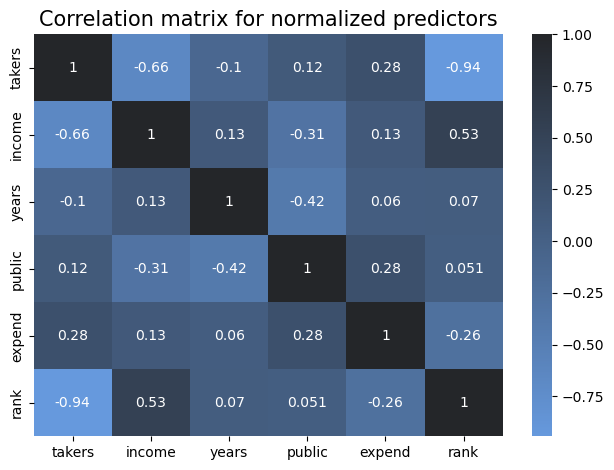

In [125]:
#Displaying correlation matrix in heat map for normalized features. 
sns.heatmap(data= standardized_correlation_matrix, annot= True, cmap= sns.dark_palette("#69d", reverse=True, as_cmap=True))
plt.title("Correlation matrix for normalized predictors", fontsize = 15)
plt.tight_layout()
plt.show()

In [126]:
standardized_covariance_matrix = X_train_full_Standardized.cov()
standardized_covariance_matrix

,takers,income,years,public,expend,rank
takers,1.020408,-0.675444,-0.103616,0.126078,0.289419,-0.962075
income,-0.675444,1.020408,0.137513,-0.312823,0.134203,0.543571
years,-0.103616,0.137513,1.020408,-0.425631,0.061050,0.071657
public,0.126078,-0.312823,-0.425631,1.020408,0.290399,0.051657
expend,0.289419,0.134203,0.061050,0.290399,1.020408,-0.270376
rank,-0.962075,0.543571,0.071657,0.051657,-0.270376,1.020408


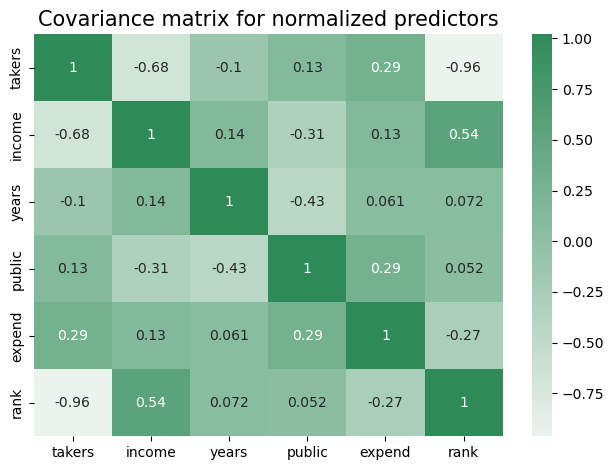

In [127]:
#Displaying Covariance matrix for normalized features
sns.heatmap(data= standardized_covariance_matrix, annot= True, cmap= sns.light_palette("seagreen", as_cmap=True))
plt.title("Covariance matrix for normalized predictors", fontsize = 15)
plt.tight_layout()
plt.show()

In [131]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_full_Standardized)

explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance
})

print("Explained Variance for each Principal Component:")
print(explained_variance_df)

Explained Variance for each Principal Component:
  Principal Component  Explained Variance
0                 PC1            0.427362
1                 PC2            0.234843
2                 PC3            0.191683
3                 PC4            0.112039
4                 PC5            0.028365
5                 PC6            0.005708


#### In your opinion, what is the “best” number of Principal Components to use? (again, answer using a markdown cell).

We can see from above result, PC1, PC2, PC3 and PC4 has significant explained variance ratio. PC1 explains the 42.7\% of the variance, PC2 explains the 23.48\% of variance, PC3 explains the 19.16\% of variance and PC4 explains the 11.2\% of variance. This means PC1 to PC4 explain around 96.6\% of variance in **SAT** score. So, Selecting PC1 to PC4 cound be the best solution. 